**ANIMATION OF BAR'S USING FUNCTION**

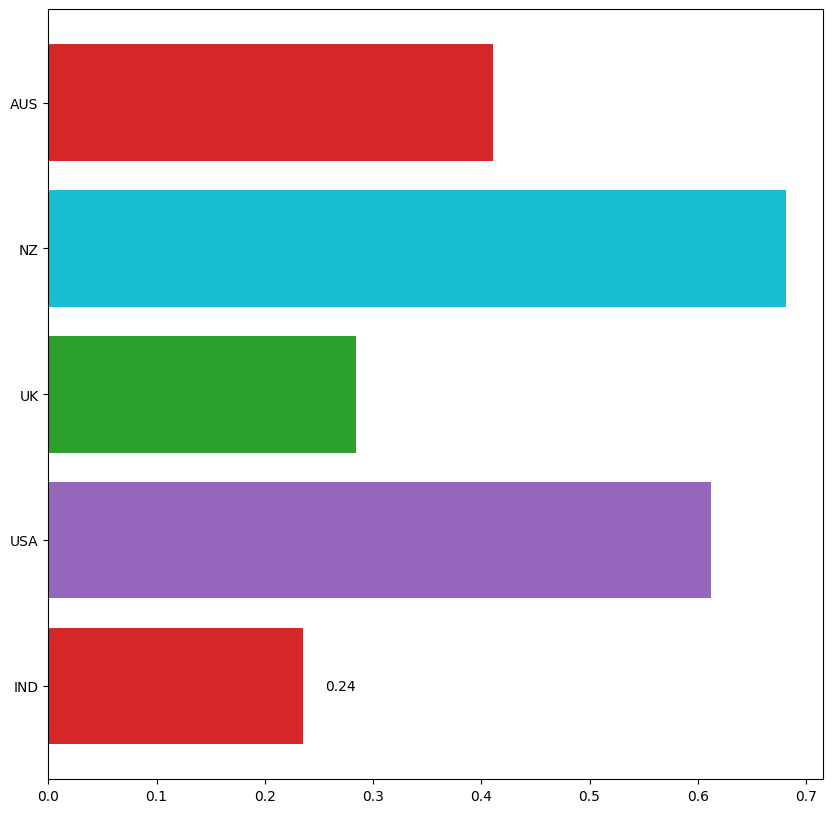

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import ArtistAnimation
fig, ax=plt.subplots(figsize=(10,10))
def update_frame(ax,countries,growth,index):
  bar_val=ax.barh(countries,growth[index],color=['tab:red','tab:purple','tab:green','tab:cyan'])
  texts_position=[]
  for i, bar in enumerate(bar_val):
    text_bar=ax.text(bar.get_width()+0.02,bar.get_y()+bar.get_height()/2,f"{bar.get_width():.2f}",fontsize=10,va="center")
    texts_position.append(text_bar)
    return list(bar_val)+texts_position
countries=["IND","USA","UK","NZ","AUS"]
years=[2001,2002,2003,2004,2005]
gdp=np.array([2,5,3.5,3.4,4])
rng=np.random.default_rng(10)
growth=rng.uniform(0.1,0.7,size=(len(years),len(countries)))
args=[update_frame(ax,countries,growth,index) for index in range(len(years))]
ani=ArtistAnimation(fig,args,interval=100,blit=False)
ani.save("gdp_1.gif",writer="pillow",fps=1)
plt.show()

**PANDAS:**

Files: Excel, CSV, JSON, SQL

{

  "DATA":{

    ____{

      ____NAME:"ABC",

      ____"AGE":20,

      ____},

      ____{

        ____NAME:"ABC",

        ____"AGE":20,

        ____}

        _____}
        
}

**Using Matplotlib with Pandas to visualize the data from csv**

In [9]:
pip install pandas

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
from matplotlib.animation import FuncAnimation
planets=pd.read_csv("/plannet.csv")
print(planets)

    planet color  size  orbitradius
0  Mercury     b    10          0.5
1    venus     g     7          0.8
2    earth     r     5          1.2


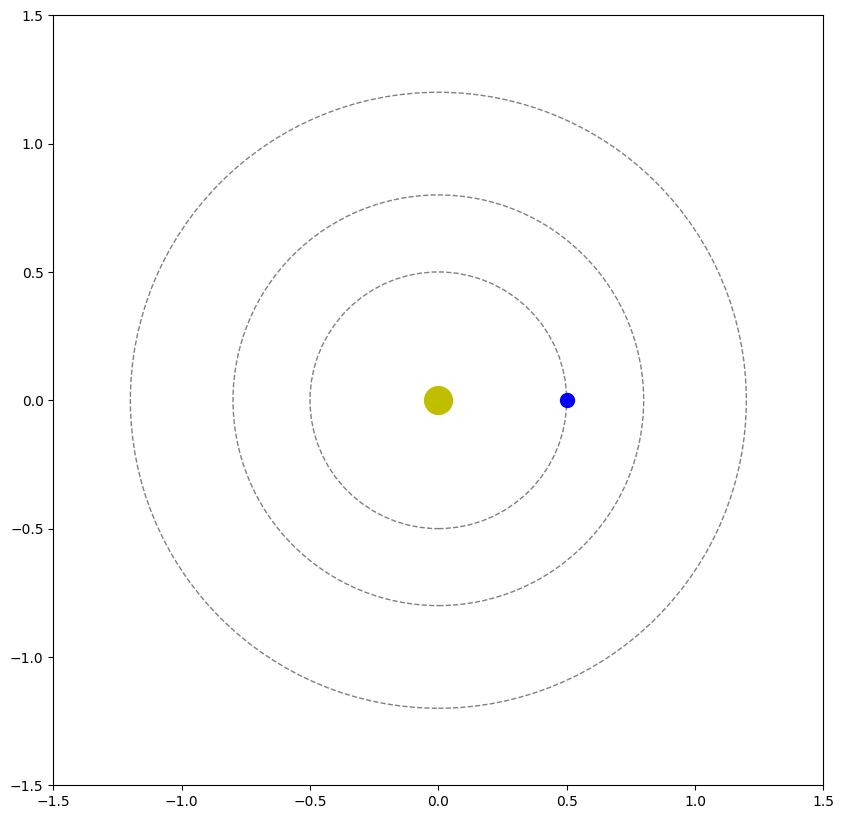

In [26]:
planet_colors=planets['color'].tolist()
planet_sizes=planets['size'].tolist()
planet_orbit_radius=planets['orbitradius'].tolist()
planet_names=planets["planet"].tolist()
fig, ax=plt.subplots(figsize=(10,10))
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_aspect('equal')

sun, =ax.plot(0,0,'yo',markersize=20,label='sun')
orbits=[]
planet_list=[]

for name,radius,color,size in zip(planet_names,planet_orbit_radius,planet_colors,planet_sizes):
  circle=plt.Circle((0,0), radius, color='gray', fill=False, linestyle="--",linewidth=1.0)
  ax.add_artist(circle)
  orbits.append(circle)
  planet,=ax.plot([],[],f'{color}o',markersize=size,label=name)
  planet_list.append(planet)
angles_planets=np.linspace(0,2*np.pi,100)

def solar(frame):
  for i, (radius,planet) in enumerate(zip(planet_orbit_radius,planet_list)):
    x=[radius*np.cos(angles_planets[frame]+i*np.pi/4)]
    y=[radius*np.sin(angles_planets[frame]+i*np.pi/4)]
    planet.set_data(x,y)
    return planet_list

anim=FuncAnimation(fig, solar, frames=100, interval=50, blit=True)
anim.save('solar_system.gif', writer="pillow")
plt.show()

